In [88]:
import base64
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import json
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

In [95]:
df = pd.read_csv('data/experiment_results_server_test.csv')

def parse(data):
    while data[0] != '{':
        data = data[1:]
    while data[-1] != '}':
        data = data[:-1]
    data = data.replace('\\', '')
    json_data = json.loads(data)
    return json_data


df = pd.concat([df, pd.json_normalize(df.apply(lambda x: parse(x['answer']), axis=1), max_level=0)], axis=1)
# blacklist = ['a']
# df = df[~df['workerid'].isin(blacklist)]
df.gaze = df.gaze.apply(lambda x: {key:val for key, val in json.loads(base64.b64decode(x)).items() if int(key) > 0})
df.sort_values(by=['workerid', 'userTrialId', 'timestamp'], inplace=True)
df

,filename,listnumber,assignmentid,hitid,workerid,origin,timestamp,partid,questionid,answer,...,choicePos,choice,coordinates,gaze,correct,deviceInfo,calibrationPrecision,techDiffs,otherComments,strategy
5,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106388,"""{\""sent_msg\"":\""bl\"",\""objs\"":[\""tr_bl\"",\""ci...",...,0,tr_bl,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...","{'39': {'x': 1189, 'y': 485, 'eyes': {'left': ...",1,"{'screen': '1728 x 1080', 'browser': 'Chrome',...","[49, 73, 57]",a,a,NaN
7,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106390,"""{\""sent_msg\"":\""sq\"",\""objs\"":[\""ci_bl\"",\""sq...",...,1,sq_gr,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...","{'30': {'x': 702, 'y': 466, 'eyes': {'left': {...",0,NaN,NaN,NaN,NaN,NaN
8,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106391,"""{\""sent_msg\"":\""ci\"",\""objs\"":[\""ci_gr\"",\""tr...",...,1,tr_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
4,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106387,"""{\""sent_msg\"":\""gr\"",\""objs\"":[\""tr_gr\"",\""tr...",...,1,tr_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
9,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106392,"""{\""sent_msg\"":\""gr\"",\""objs\"":[\""sq_gr\"",\""ci...",...,1,ci_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
3,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106386,"""{\""sent_msg\"":\""bl\"",\""objs\"":[\""sq_bl\"",\""ci...",...,1,ci_bl,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
11,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106394,"""{\""sent_msg\"":\""ci\"",\""objs\"":[\""ci_re\"",\""tr...",...,1,tr_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
6,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106389,"""{\""sent_msg\"":\""tr\"",\""objs\"":[\""sq_re\"",\""tr...",...,1,tr_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...","{'32': {'x': 517, 'y': 305, 'eyes': {'left': {...",1,NaN,NaN,NaN,NaN,NaN
0,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106383,"""{\""sent_msg\"":\""re\"",\""objs\"":[\""tr_bl\"",\""ci...",...,1,ci_re,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN
1,inputdata_simplified.csv,NaN,NOT AVAILABLE,NOT AVAILABLE,a,PROLIFIC,14-Jan-2025 16:22:55,7104,106384,"""{\""sent_msg\"":\""ci\"",\""objs\"":[\""ci_re\"",\""ci...",...,1,ci_bl,"{'sent_msg': {'x': 956, 'y': 125, 'width': 100...",{},0,NaN,NaN,NaN,NaN,NaN


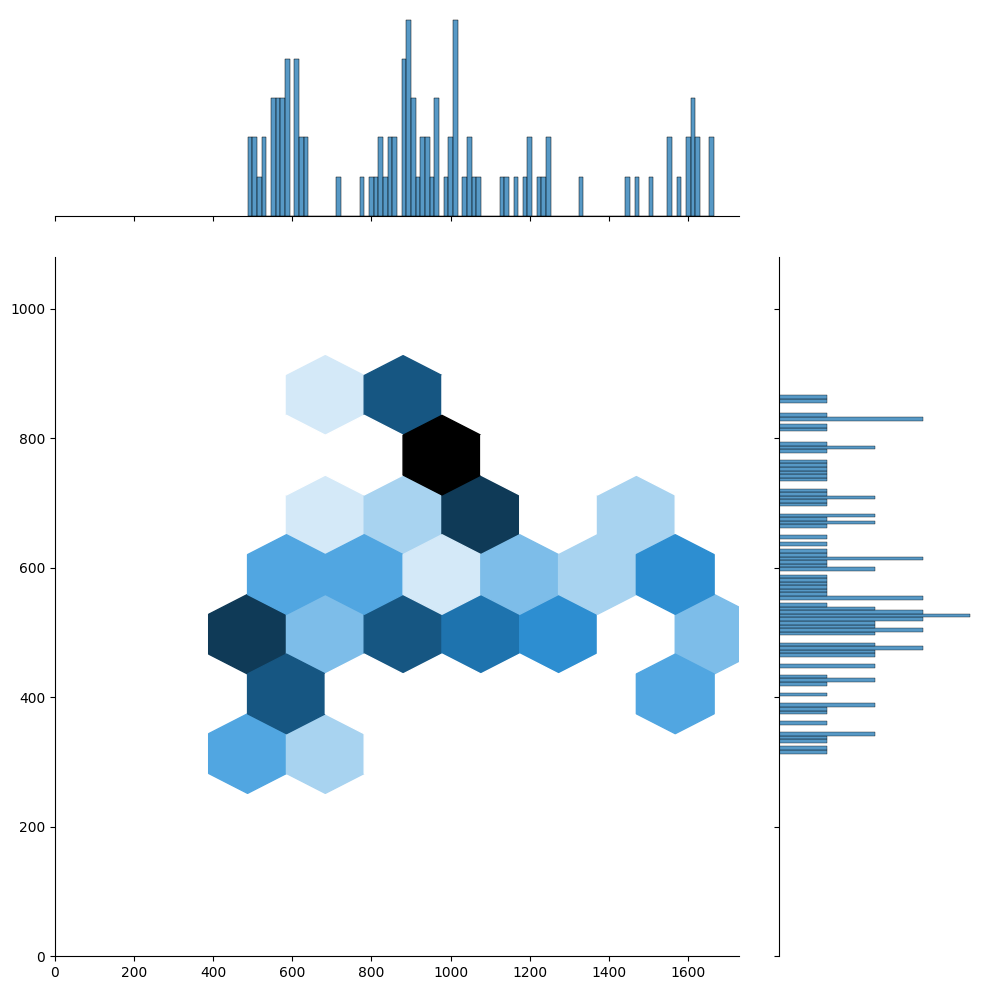

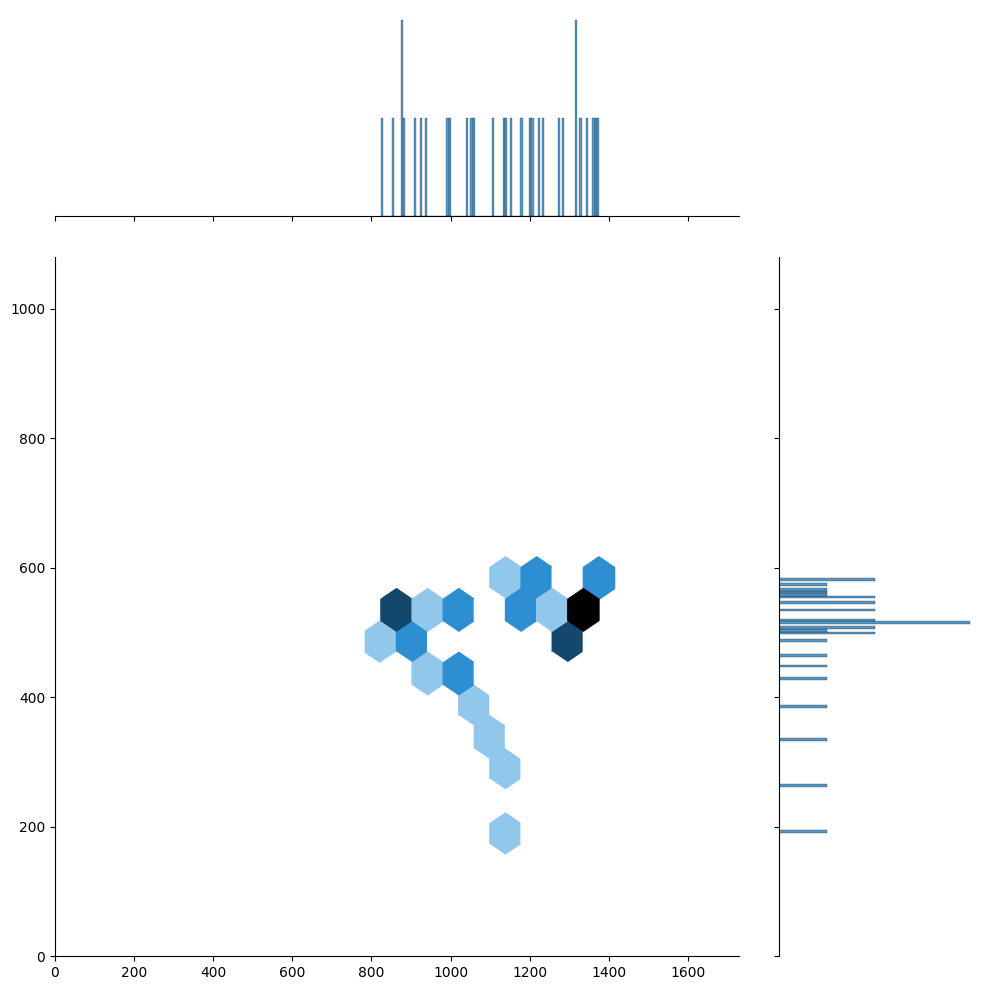

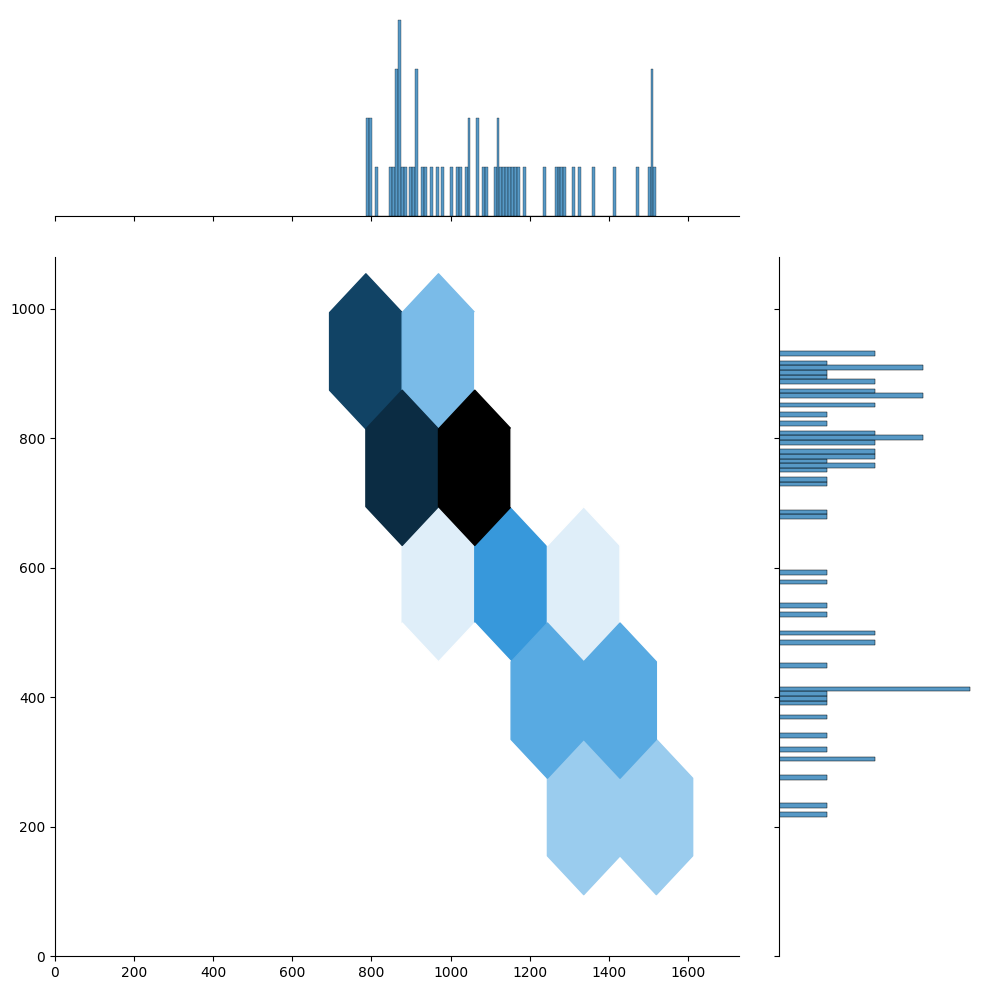

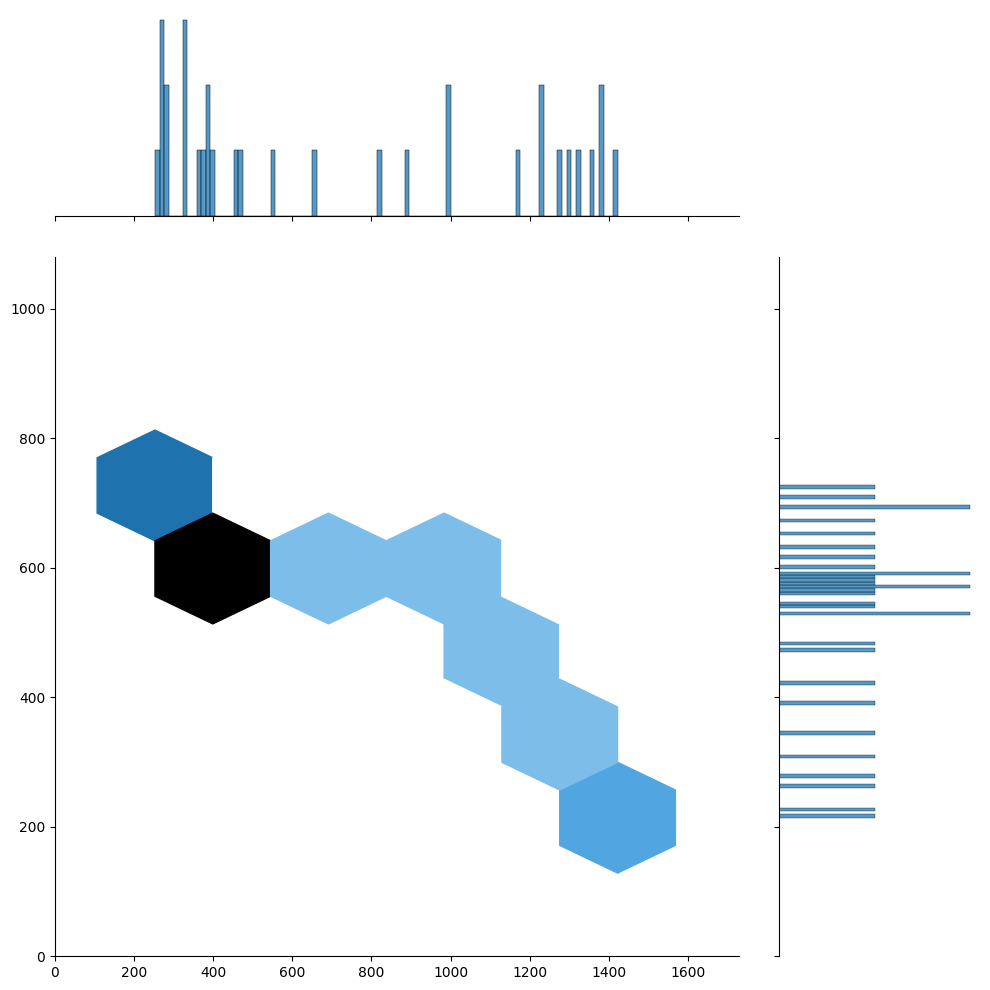

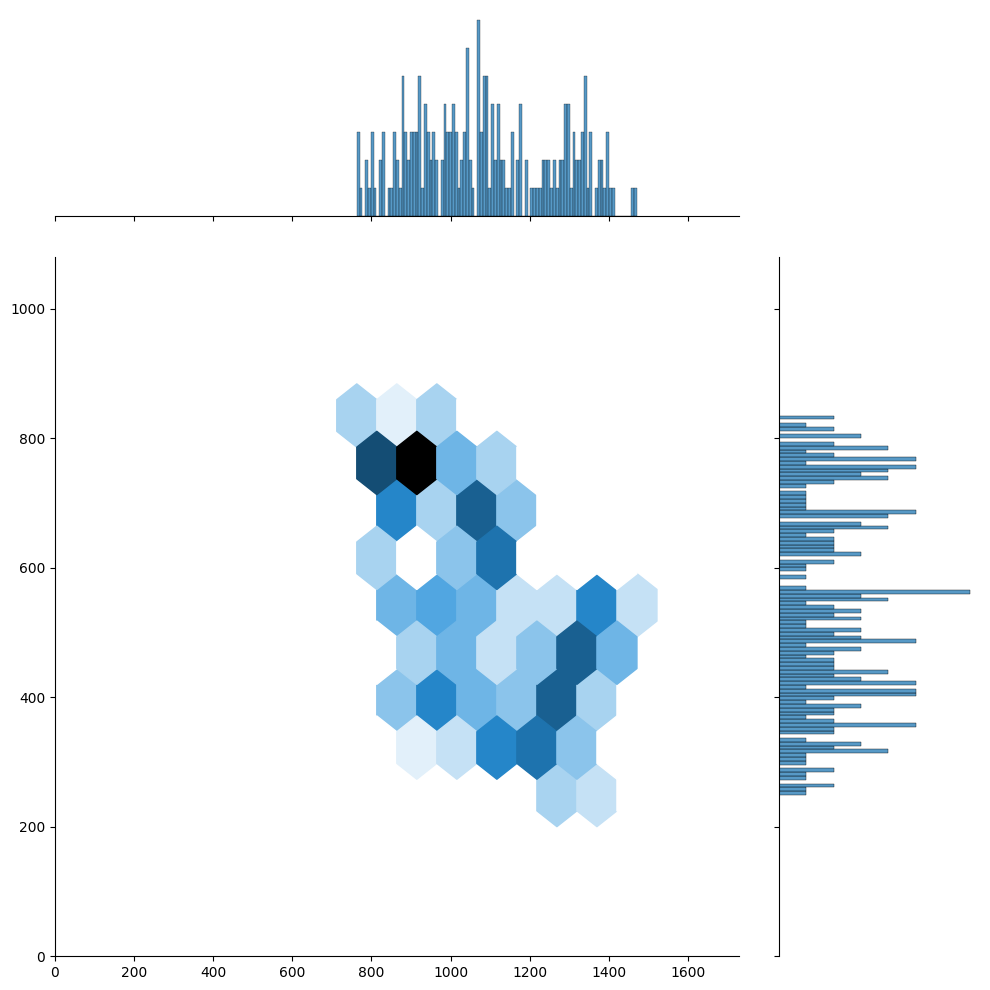

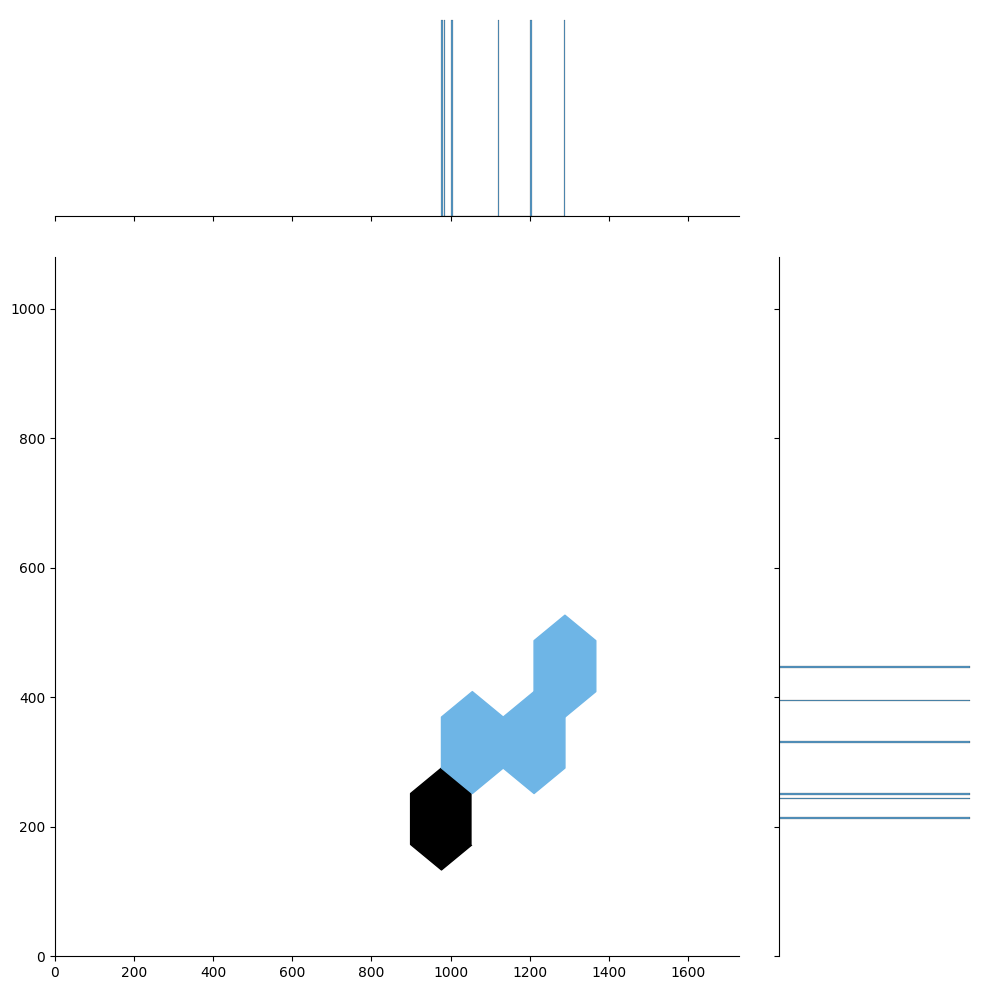

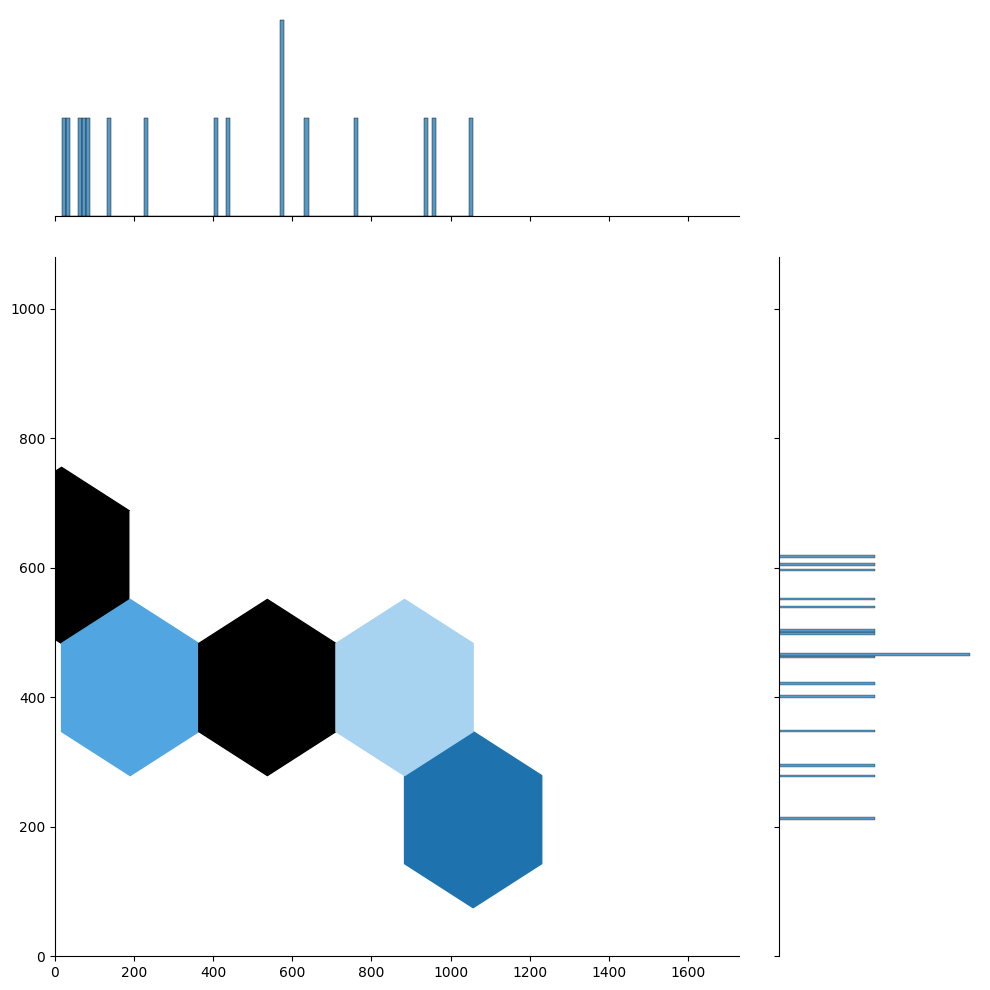

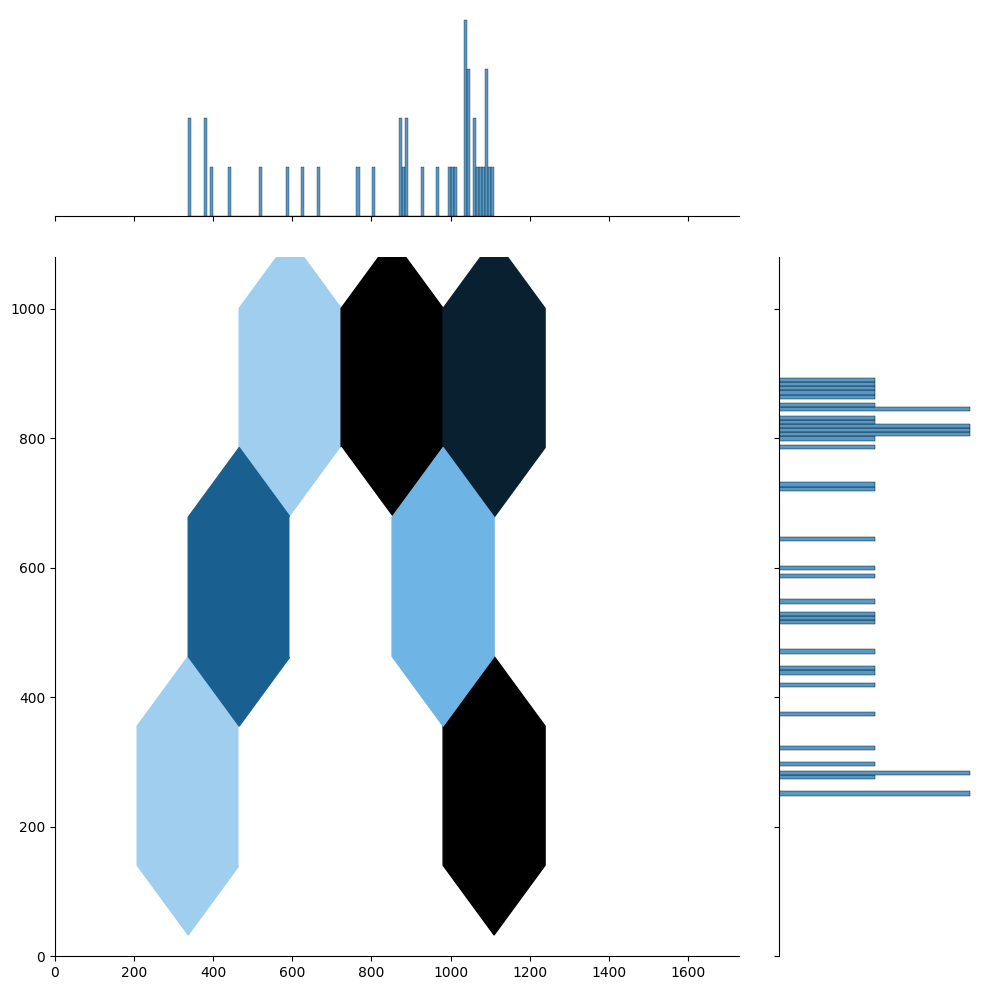

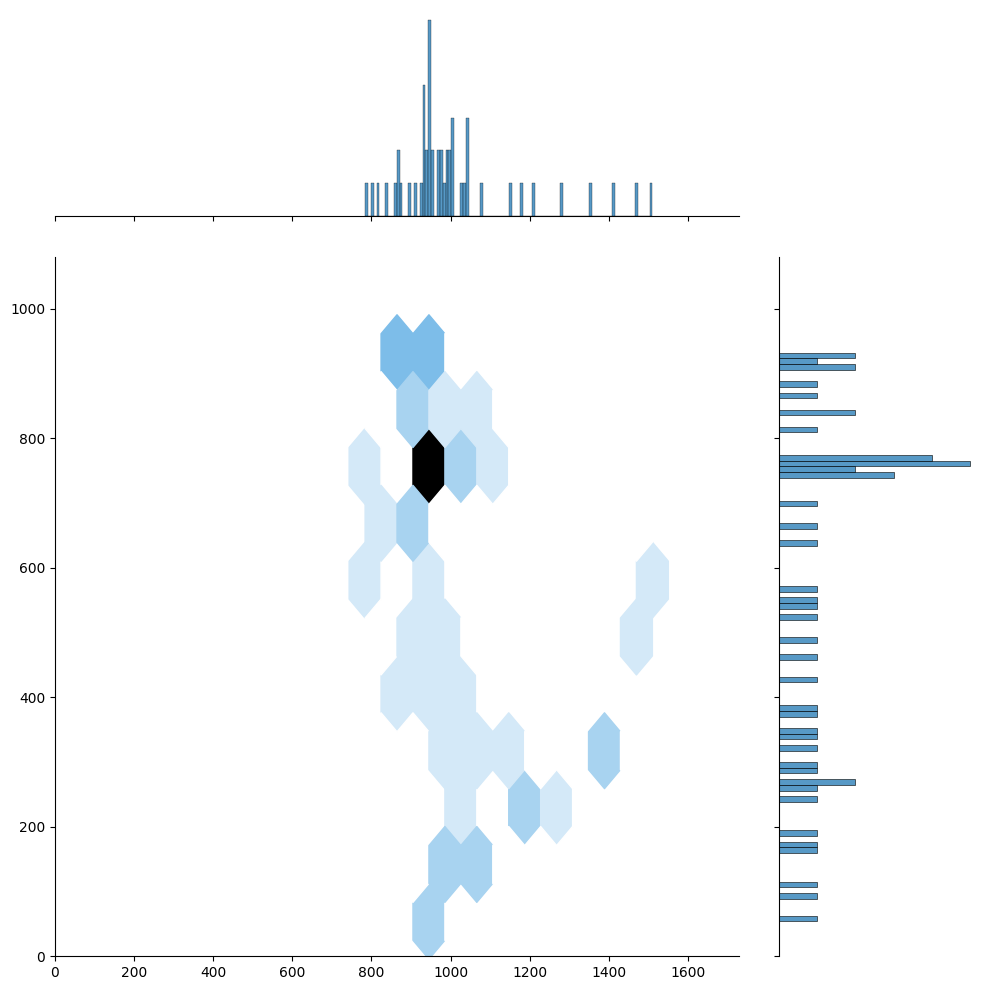

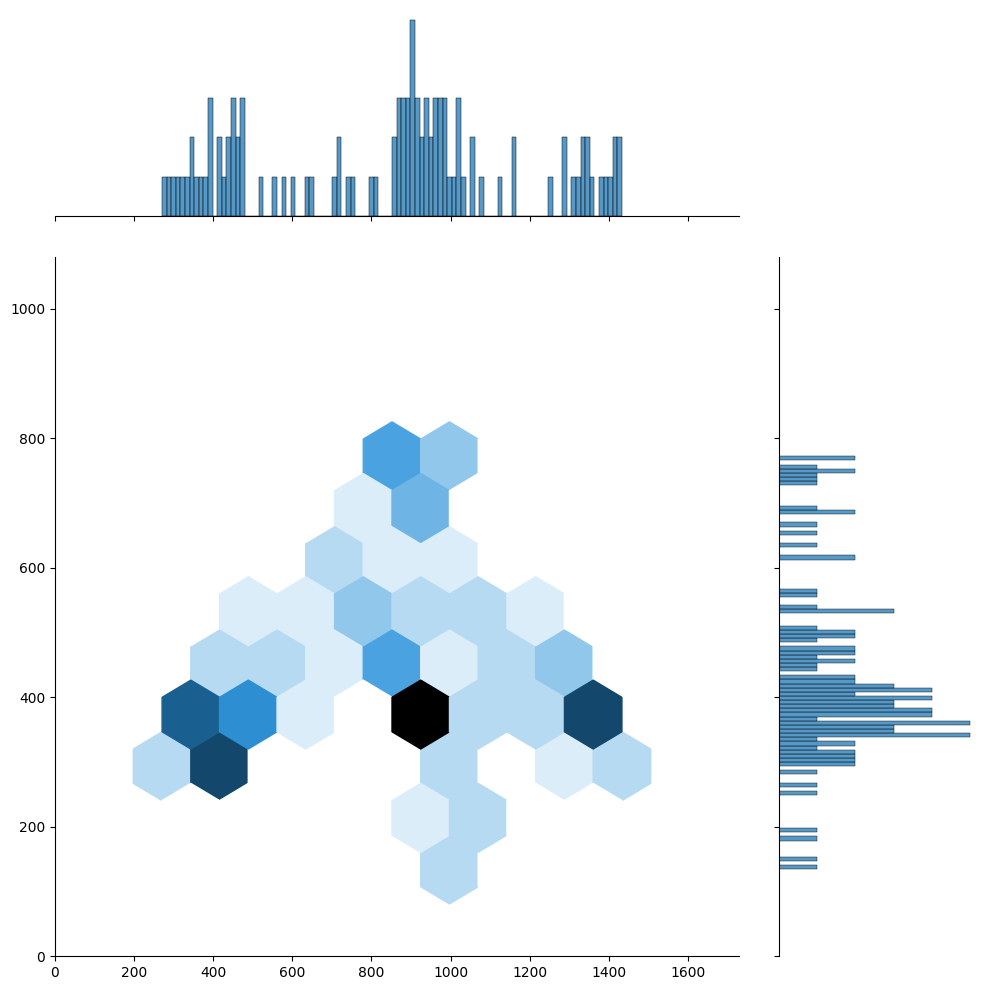

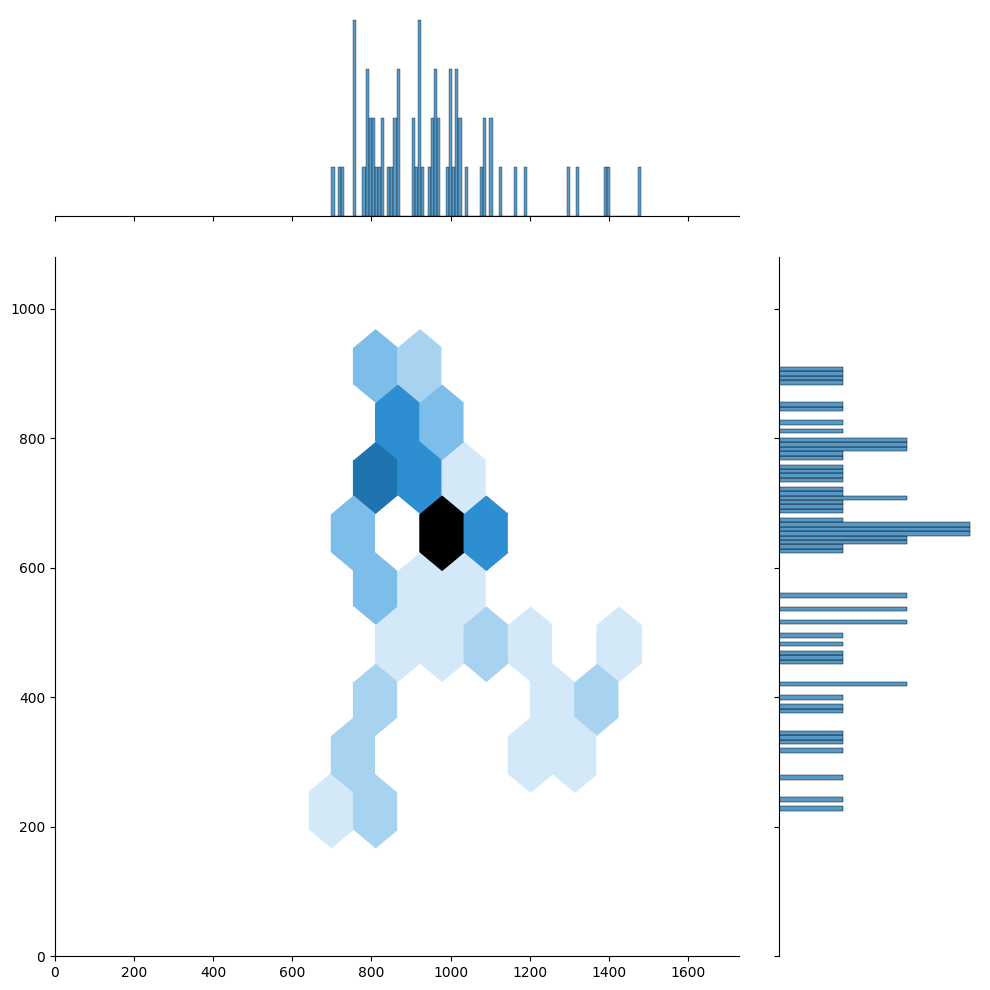

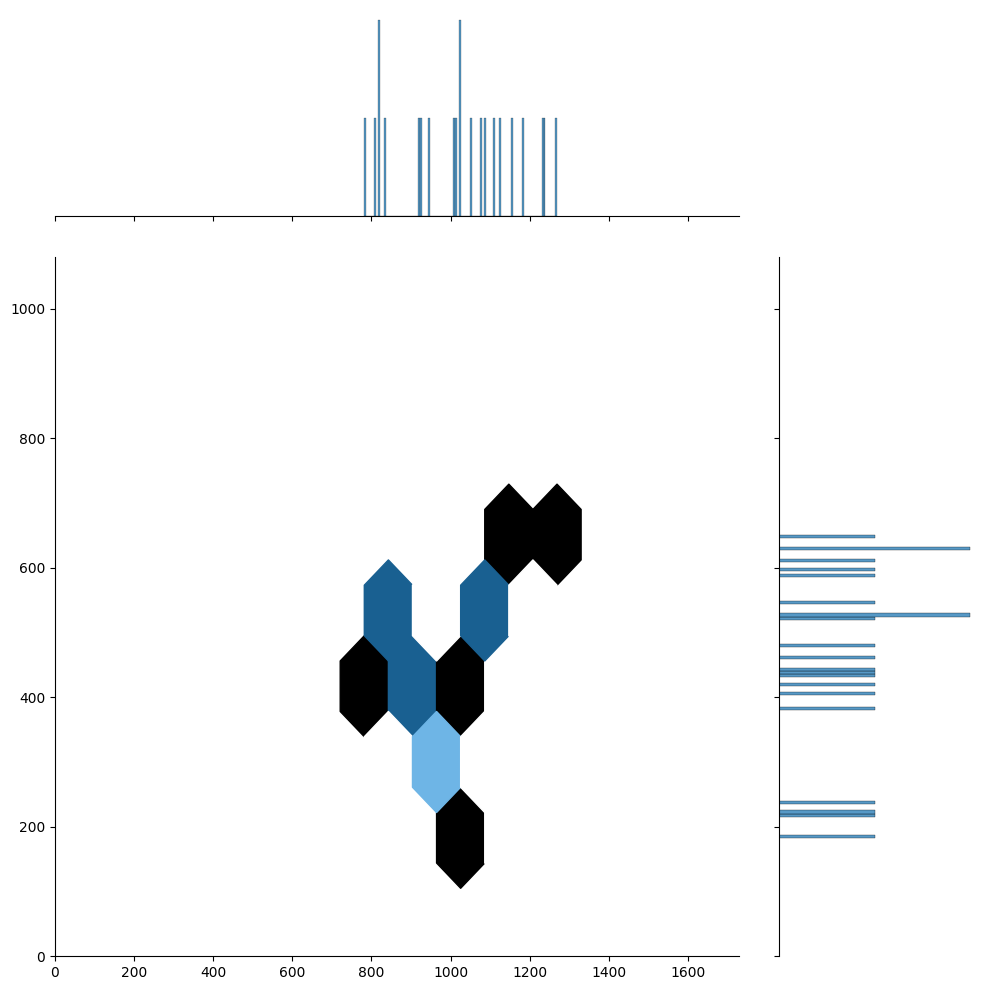

In [ ]:
sample = df[df['workerid']=='k']
resolution = sample.iloc[0].deviceInfo['screen'].split('x')
resolution = (int(resolution[0]), int(resolution[1]))
for i in range(12):
    gaze_sample = sample.gaze.iloc[i]
    x = np.array([g['x'] for g in gaze_sample.values()])
    y = np.array([g['y'] for g in gaze_sample.values()])
    # keep proportions of the screen
    sns.jointplot(x=x, y=y, kind='hex', xlim=(0, resolution[0]), ylim=(0, resolution[1]), height=10, ratio=3)

plt.show()